In [17]:
library(Seurat)
library(ggplot2)
library(scales)

In [2]:
scrna = readRDS("../20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

In [3]:
atac.to.rna.metadata = read.table("../20200828_RNA_Seurat/sessions/20210725_n59378/atac.20210717_n62599.cluster.transfer.tsv", header=T)
head(atac.to.rna.metadata)

,barcode,sample,atac_cluster
,<fct>,<fct>,<int>
1,AAACCCAAGAGTGACC-1,D0,1
2,AAACCCAAGTGCCAGA-1,D0,1
3,AAACCCACACCATTCC-1,D0,1
4,AAACCCACACGCGTCA-1,D0,1
5,AAACCCAGTCCATAGT-1,D0,1
6,AAACCCAGTTATTCTC-1,D0,1


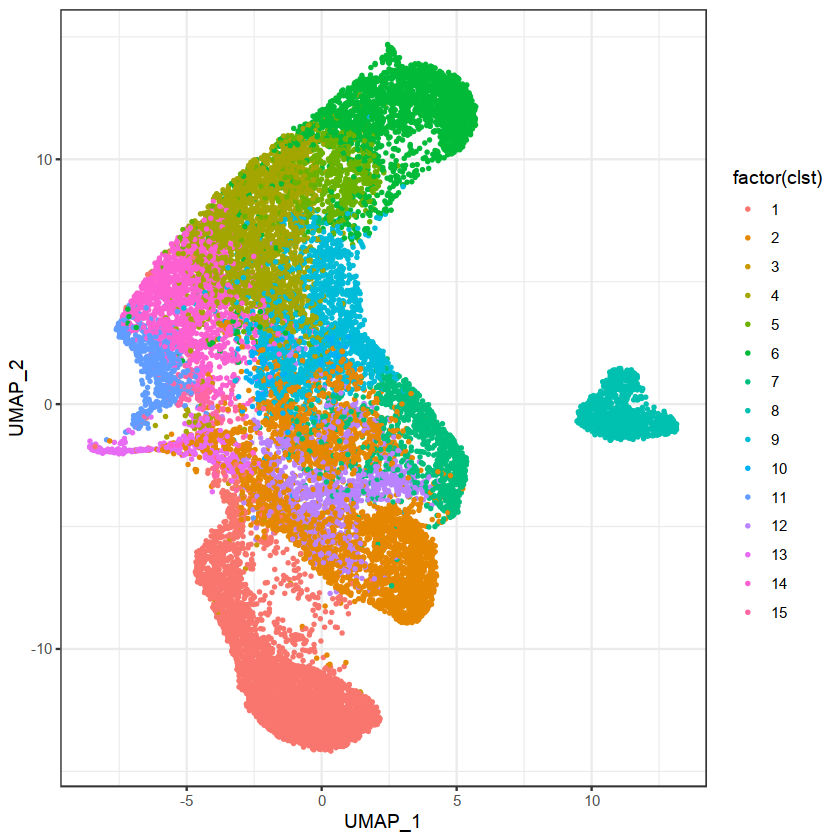

In [4]:
tmp = data.frame(scrna@reductions$umap@cell.embeddings)
tmp$clst = atac.to.rna.metadata$atac_cluster

tmp = tmp[sample(nrow(tmp), 20000), ]

ggplot(tmp) +
geom_point(aes(x=UMAP_1,y=UMAP_2, col=factor(clst)), size=0.5) +
theme_bw()

In [7]:
scrna@meta.data$trans_clst = atac.to.rna.metadata$atac_cluster
scrna = SetIdent(scrna, value="trans_clst")

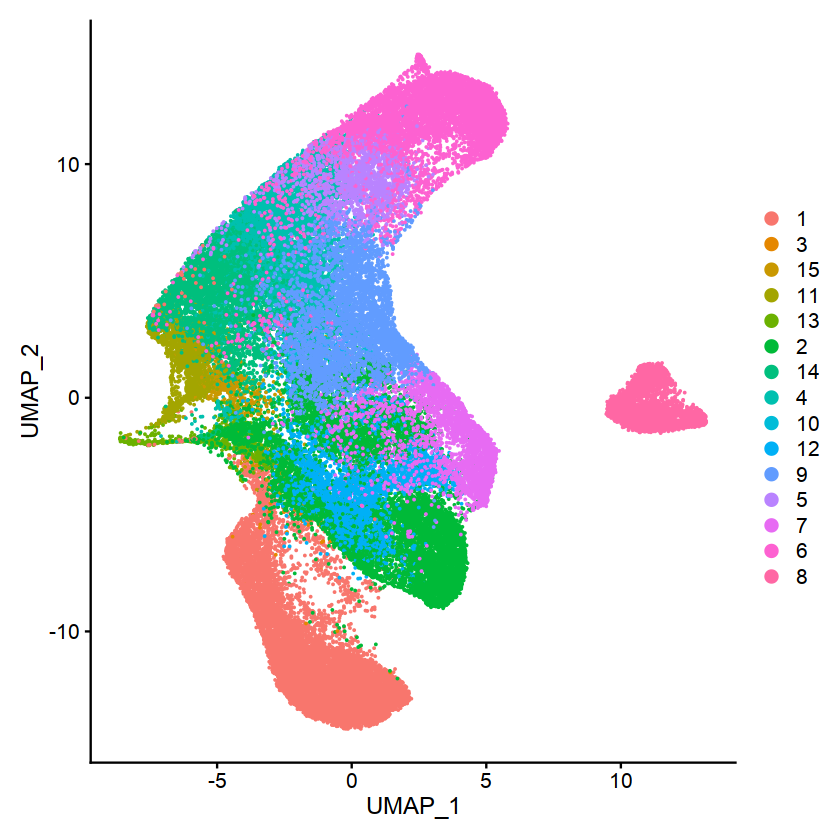

In [8]:
DimPlot(scrna)

In [9]:
fibr_vs_ipsc = FindMarkers(scrna, only.pos = T, ident.1 = 1, ident.2 = 8, min.pct = 0.25)

In [12]:
fibr_vs_ipsc = fibr_vs_ipsc[fibr_vs_ipsc$p_val_adj < 0.01, ]

In [13]:
dim(fibr_vs_ipsc)

[1] 1113    5

In [14]:
head(fibr_vs_ipsc)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100A6,0,4.315621,1.000,0.275,0
LGALS1,0,4.094338,1.000,0.363,0
VIM,0,3.763129,1.000,0.483,0
COL1A1,0,3.033199,0.997,0.160,0
MT2A,0,3.021316,0.997,0.360,0
COL1A2,0,2.551037,0.997,0.304,0


In [29]:
head(fibr_vs_ipsc[rev(order(fibr_vs_ipsc$pct.1 - fibr_vs_ipsc$pct.2)),], 30)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPS4Y1,0,2.1675126,0.994,0.000,0
COL6A3,0,2.0892117,0.987,0.013,0
COL3A1,0,1.9909915,0.965,0.000,0
NUPR1,0,1.9440303,0.943,0.003,0
DCN,0,2.2370759,0.918,0.000,0
CD44,0,1.6945741,0.970,0.053,0
ARID5B,0,1.5686209,0.933,0.038,0
ANXA1,0,1.4771869,0.909,0.019,0
FOS,0,1.8221985,0.940,0.062,0


In [15]:
mean_set_scaled = as.vector(colMeans(scrna@assays$RNA@scale.data[rownames(fibr_vs_ipsc), ]))

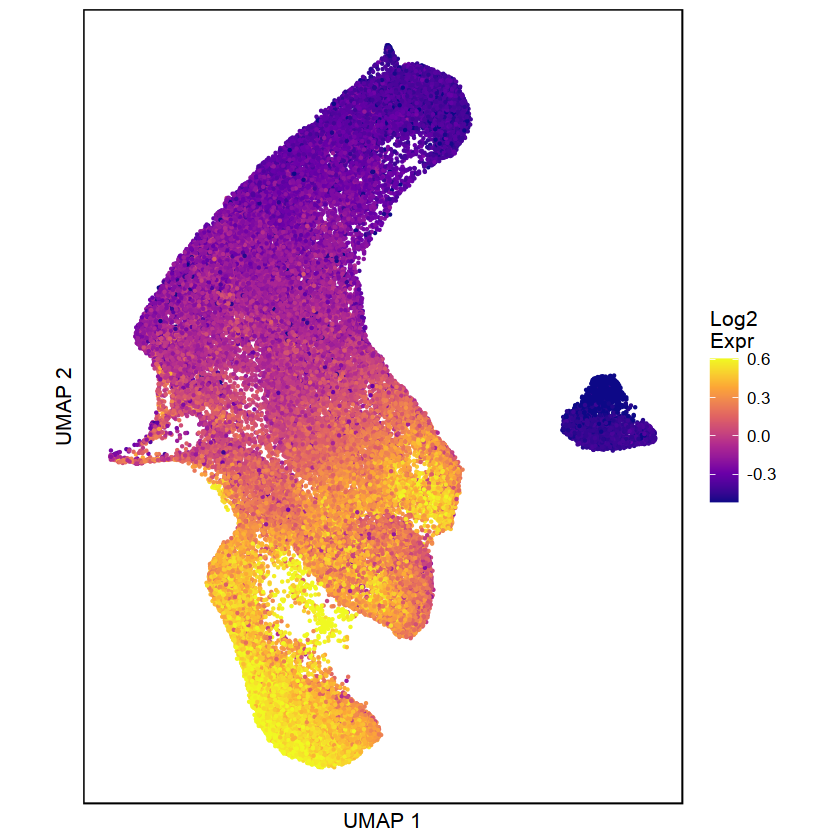

In [24]:
tmp = data.frame(scrna@reductions$umap@cell.embeddings)
tmp$val = mean_set_scaled

tmp = tmp[sample(nrow(tmp)), ]

ggplot(tmp) +
# ggplot(df[df$x.sp.sample %in% c("D14"), ]) +
geom_point(size=.2, aes(x=UMAP_1 , y=UMAP_2, col=val),) +
scale_color_viridis_c(option = "C", name="Log2\nExpr", 
                     limits=c(quantile(tmp$val, 0.02),quantile(tmp$val, 0.98)), oob=squish) +
theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()    

[1] 2.217813

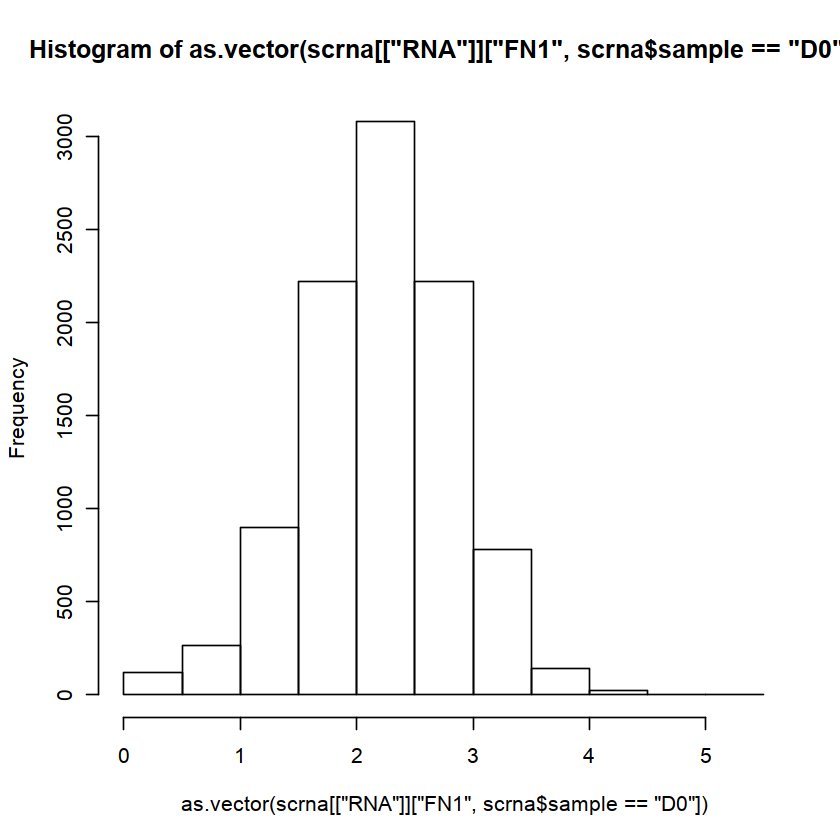

In [34]:
hist(as.vector(scrna[["RNA"]]["FN1", scrna$sample=="D0"]))
median(as.vector(scrna[["RNA"]]["FN1", scrna$sample=="D0"]))

In [25]:
write.table(rownames(fibr_vs_ipsc), "./fibr_ipsc_diff.txt", quote=F, row.names=F, col.names=F)